# Wicklow isolates snipgenie analysis

* https://www.microbiologyresearch.org/content/journal/mgen/10.1099/mgen.0.000388?crawler=true

In [329]:
import sys,os,shutil,subprocess
import glob
from importlib import reload
import numpy as np
import pandas as pd
pd.set_option('display.width', 200)
import pylab as plt
import matplotlib as mpl
from Bio import SeqIO
sys.path.append('pathogenie')
from snipgenie import tools, aligners, app, trees, plotting
import rpy2

## Run workflow 

In [ ]:
reload(app)
reload(tools)
args = {'threads':12, 'outdir': '/storage/btbgenie/wicklow_results', 'labelsep':'_',
        'input':['/storage/btbgenie/mbovis_ireland/Wicklow/'],        
         'species': 'Mbovis-AF212297',
         'overwrite':False,
         'custom_filters': True, 'get_stats':False,        
         'buildtree':True}
W = app.WorkFlow(**args)
st = W.setup()
W.run()

In [ ]:
#snprecs, smat = tools.fasta_alignment_from_vcf('/storage/btbgenie/wicklow_results/filtered.vcf.gz', omit=['161-MBovis'])

In [131]:
meta = pd.read_csv('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv')
clusts = trees.get_clusters('/storage/btbgenie/wicklow_results/tree.newick')

TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 3 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 5 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 7 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 10 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 12 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 20 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 50 -m max_clade
TreeCluster.py  -i /storage/btbgenie/wicklow_results/tree.newick -t 100 -m max_clade


In [128]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [207]:
%%R
source('drawtrees.R')
options(repr.plot.width=20, repr.plot.height=10)

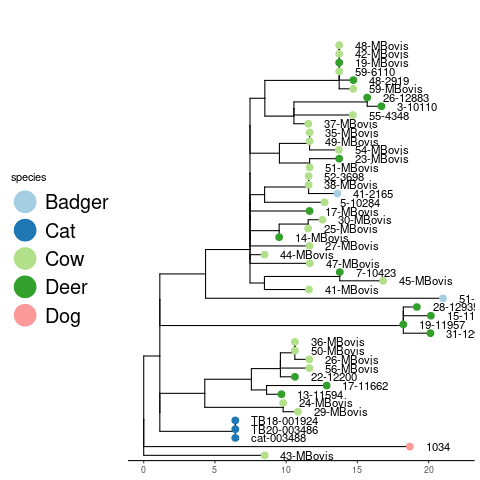

In [224]:
%%R
meta <- read.table('/storage/btbgenie/mbovis_ireland/all_ireland_samples.csv',sep=',',
                      header=TRUE,row.names=1)
meta[is.na(meta)] <- "-"
meta[] <- lapply(meta, as.character)
mltree <- read.tree('/storage/btbgenie/wicklow_results/tree.newick')
mltree <- drop.tip(mltree,c('ref'))
#mltree <- root(mltree, outgroup='44-MBovis')
ggplottree(mltree, meta, 'species', layout='rect', cmap='Paired', tiplabel=TRUE)


## snp distance matrix

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


cat-003488      0
TB18-001924     0
TB20-003486     0
44-MBovis      12
13-11594       13
14-MBovis      13
24-MBovis      13
29-MBovis      14
50-MBovis      14
22-12200       14
Name: cat-003488, dtype: int64

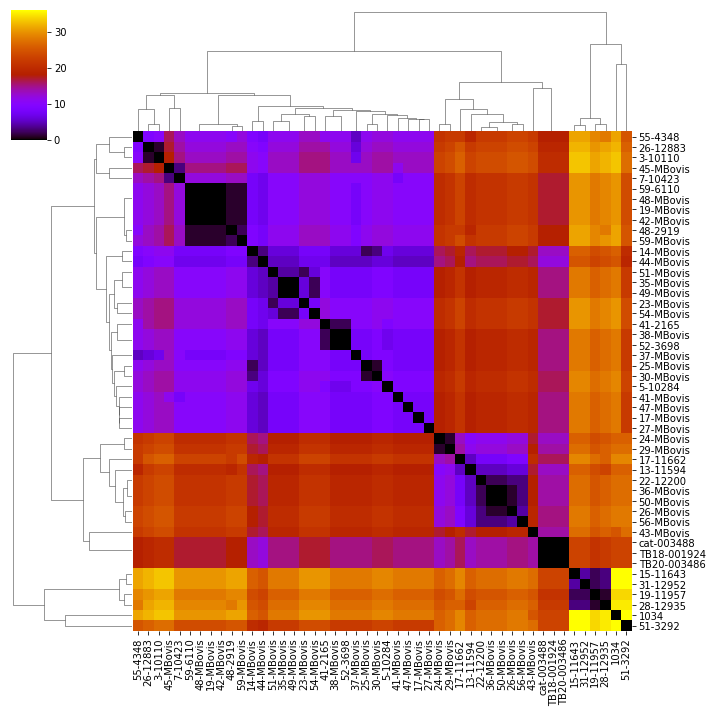

In [210]:
dm = pd.read_csv('/storage/btbgenie/wicklow_results/snpdist.csv',index_col=0)
import seaborn as sns
sns.clustermap(dm, cmap='gnuplot',xticklabels=True,yticklabels=True)

c = dm.loc['cat-003488'].sort_values()[:10]
c
#meta[meta['sample'].isin(c.index)]

In [133]:
csq = app.read_csq_file('/storage/btbgenie/wicklow_results/csq.tsv')
snpmat = app.get_aa_snp_matrix(csq)

In [ ]:
indcsq = app.read_csq_file('/storage/btbgenie/wicklow_results/indels.vcf.gz')

In [313]:
#snps unique to a sample
names = ['cat-003488','TB18-001924','TB20-003486']
#names = ['1034']
reload(tools)
u=tools.get_unique_snps(names, snpmat, False)
u

,,,sample,cat-003488
start,gene,aa,snp_type,
2284754,pks12,3519D>3519E,missense,0


In [316]:
df=tools.vcf_to_dataframe('/storage/btbgenie/wicklow_results/temp.vcf')
df[df.pos==2284754]

,sample,REF,ALT,mut,DP,ADF,ADR,AD,chrom,var_type,sub_type,pos,start,end,QUAL
11232,1034,G,C,2284754G>C,9,"[0, 2]","[0, 7]","[0, 9]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11233,13-11594,G,C,2284754G>C,23,"[0, 14]","[0, 8]","[0, 22]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11234,14-MBovis,G,C,2284754G>C,51,"[0, 19]","[0, 32]","[0, 51]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11235,15-11643,G,C,2284754G>C,37,"[0, 22]","[0, 15]","[0, 37]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11236,17-11662,G,C,2284754G>C,45,"[0, 23]","[0, 22]","[0, 45]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11237,17-MBovis,G,C,2284754G>C,18,"[0, 9]","[0, 9]","[0, 18]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11238,19-11957,G,C,2284754G>C,36,"[0, 20]","[0, 16]","[0, 36]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11239,19-MBovis,G,C,2284754G>C,25,"[0, 12]","[0, 13]","[0, 25]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11240,22-12200,G,C,2284754G>C,48,"[1, 19]","[0, 28]","[1, 47]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9
11241,23-MBovis,G,C,2284754G>C,56,"[0, 23]","[0, 32]","[0, 55]",LT708304.1,snp,tv,2284754,2284753.0,2284754.0,11703.9


In [317]:
from igv_jupyterlab import IGV

url = 'http://localhost:8889/files/'

bams={'cat':'wicklow_results/mapped/cat-003488.bam',
      'cat2018':'wicklow_results/mapped/TB18-001924.bam',
      'cat2020':'wicklow_results/mapped/TB20-003486.bam',
      '24':'wicklow_results/mapped/24-MBovis.bam'      
      }

track_list = [{"name": "Mbovis",
                "url": url+"wicklow_results/Mbovis_AF212297.gb.gff",
                "format": "gff",
                "type": "annotation",
                "height":120,
                "indexed": False }              
             ]

colors=['orange','green','lightblue','gray']
i=0
for b in bams:
    d = {"name": b,
        "url":url+bams[b],
        "type": "alignment",
         "displayMode":"SQUISHED",
         "height":110,
         "removable":True,
         "color":colors[i],
        "indexed": True }
    track_list.append(d)
    i+=1

v = IGV.create_track(
    name="VCF",
    url=url+"wicklow_results/filtered.vcf.gz",
    #format="vcf",
    type="variant",
    indexed=True
)
track_list.append(v)

genome = IGV.create_genome(
    name="Mbovis",   
    fasta_url=url+'Mbovis_AF212297.fa',
    index_url=url+'Mbovis_AF212297.fa.fai',
    tracks=track_list
)

igv = IGV(genome=genome)
igv.locus="LT708304.1:2283938-2285249" #4274632-4300343
display(igv)


IGV(id='igv_3759945', initialConfig={'id': 'igv_3759945', 'locus': '', 'reference': {'name': 'Mbovis', 'fastaU…

## RD analysis

In [ ]:
from snipgenie import rdiff
reload(rdiff)
rdiff.create_rd_index()
df = W.fastq_table
res = rdiff.find_regions(df,'/storage/btbgenie/wicklow_rd',threads=12)

In [ ]:
X = rdiff.get_matrix(res, cutoff=0.15)
X['ident'] = X.apply(rdiff.apply_rules,1)
plotting.heatmap(X.set_index('ident',append=True), cmap='cubehelix',h=8)
#plt.savefig('rd_wicklow.png')

In [ ]:
samples=pd.read_csv('/storage/btbgenie/wicklow_results/samples.csv')

In [ ]:
reload(rdiff)
names = ['1034', '13-11594', '14-MBovis', '15-11643',
 '17-11662', 'TB18-001924', 'TB20-003486', 'cat-003488']
sub = samples#[samples['sample'].isin(names)]
x = rdiff.get_deletions(sub, app.mbovis_genome, app.mbovis_gb, #mask_file=app.mbovis_mask,
                              label='sample', n_cores=12)
#x.to_csv('wicklow_deletion_regions.csv',index=False)

In [291]:
reload(rdiff)
x = pd.read_csv('wicklow_deletion_regions.csv')
regions = rdiff.filter_regions(x, app.mbovis_mask)

1579
251


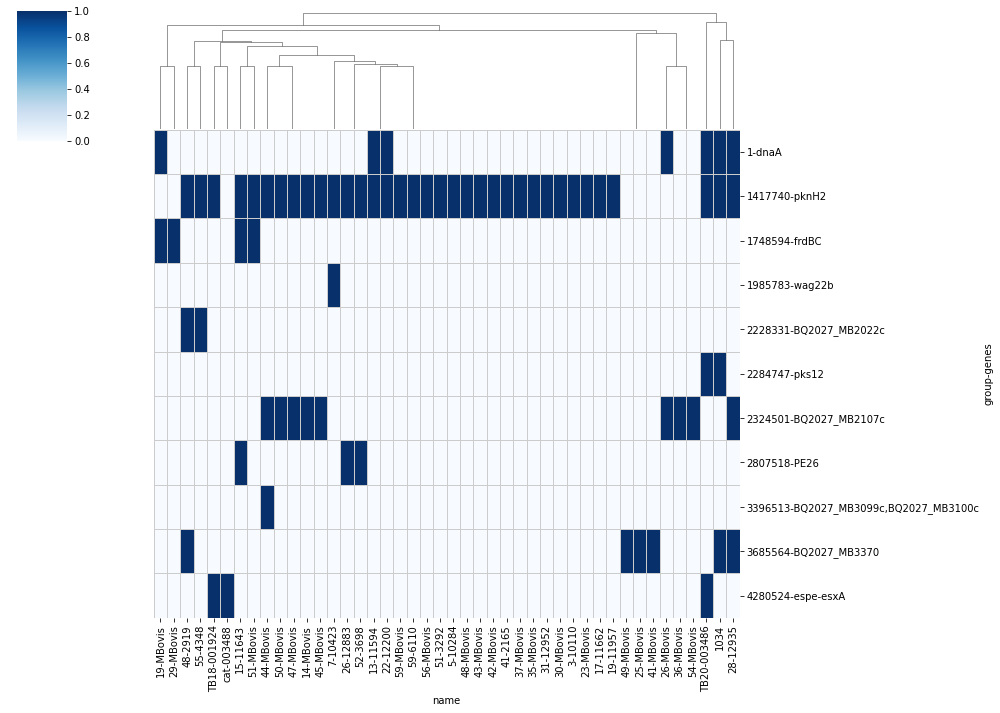

In [330]:
regions
res=regions[regions.length>2]
X=pd.pivot_table(res,index=['group','genes'],columns='name',values='length').fillna(0)
X=X.clip(0,1)
#X=X[X.sum(1)>2]
X
sns.clustermap(X,cmap='Blues',row_cluster=False,yticklabels=True,lw=1,linecolor='.8',figsize=(14,10))

In [ ]:
s=2684020;e=s+10
s=1985783;e=s+20
rdiff.show_coverage(samples,'LT708304.1',s,e,app.mbovis_genome,app.mbovis_gb, minq=0,
                      labelcol='sample',margin=100)

## bionumerics comparison

In [ ]:
reload(app)
reload(tools)
#run only samples to compare to bionumerics tree
names = ['26-12883','55-4348','48-2919','59-6110','41-2165','52-3698','51-3292','13-11594',
         '17-11662','19-11957','28-12935','15-11643','31-12952','22-12200']

path='/storage/btbgenie/wicklow_results/mapped/'
bam_files = app.get_files_from_paths(path, '*.bam', filter_list=names)
#print (bam_files)
app.run_bamfiles(bam_files, app.mbovis_genome,outdir='wicklow_compare',threads=10,custom_filters=True,mask=None)